# Machine Learning Project on Telecommunication-Churn Analysis

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [62]:
df=pd.read_csv(r"C:\Users\Mahammad Iliyas\Downloads\churn_dataset.csv")

In [63]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [64]:
df.shape

(7043, 21)

In [65]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [66]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [67]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [68]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [69]:
df.loc[df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [70]:
df.dropna(how = 'any', inplace = True)

In [71]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [73]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [74]:
df.duplicated().sum()

0

In [75]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


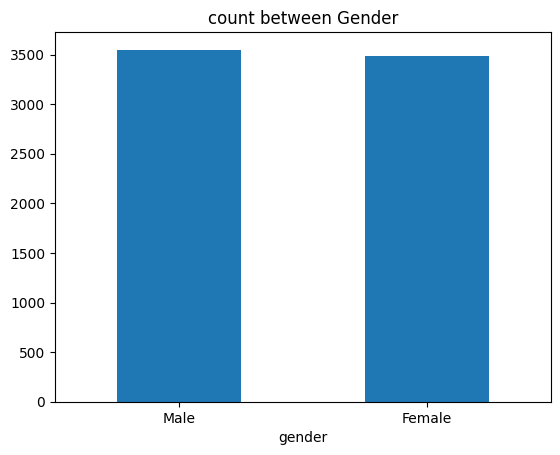

In [16]:
df['gender'].value_counts().plot(kind='bar').set(title='count between Gender')
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '50.5%'), Text(0, 0, '49.5%')]

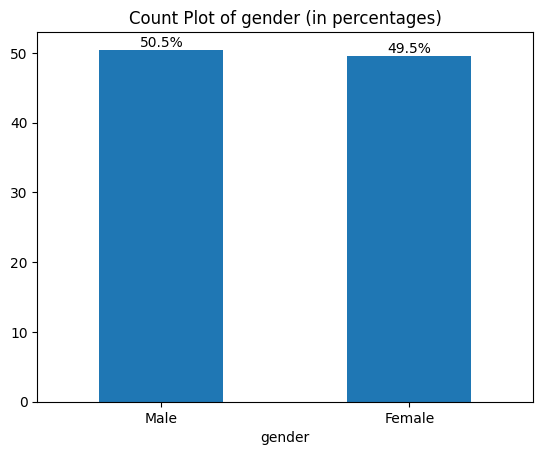

In [17]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['gender'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of gender (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

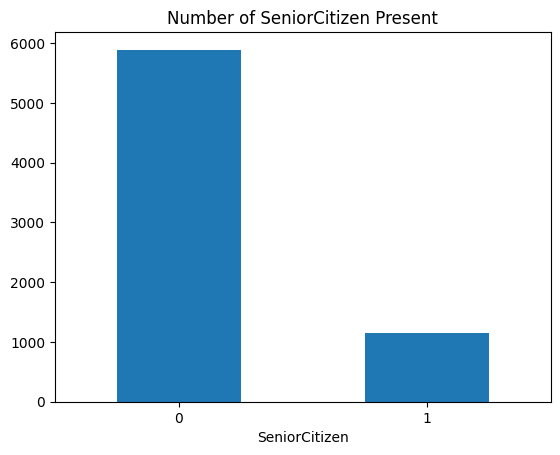

In [17]:
df['SeniorCitizen'].value_counts().plot(kind='bar').set(title='Number of SeniorCitizen Present')
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '83.8%'), Text(0, 0, '16.2%')]

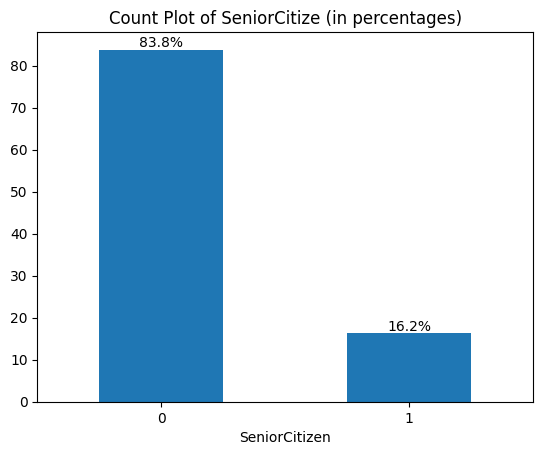

In [19]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['SeniorCitizen'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of SeniorCitize (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

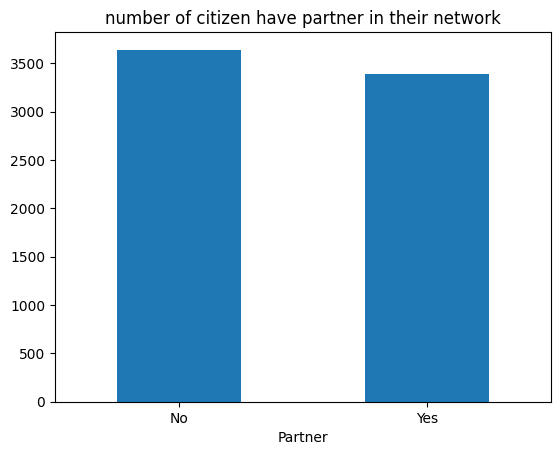

In [18]:
df['Partner'].value_counts().plot(kind='bar').set(title='number of citizen have partner in their network')
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '51.7%'), Text(0, 0, '48.3%')]

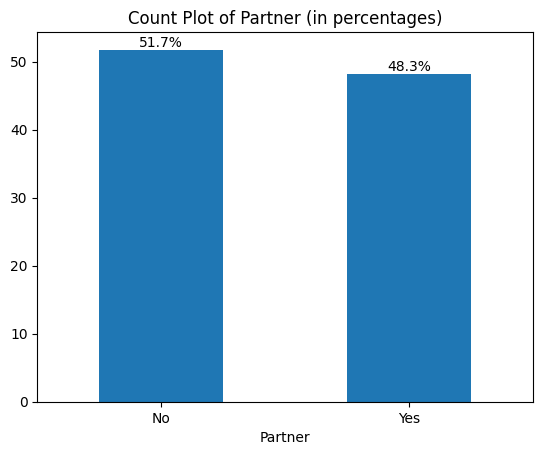

In [21]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['Partner'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of Partner (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

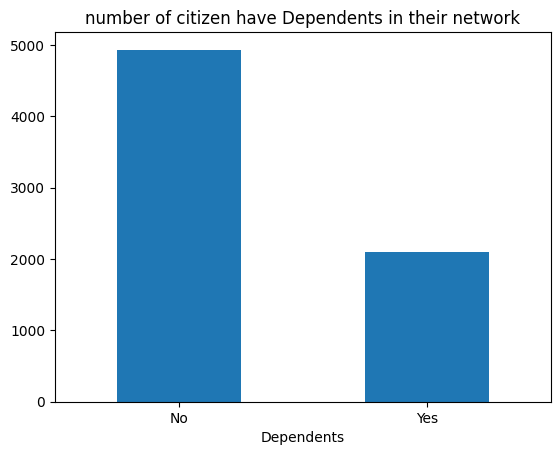

In [19]:
df['Dependents'].value_counts().plot(kind='bar').set(title='number of citizen have Dependents in their network')
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '70.2%'), Text(0, 0, '29.8%')]

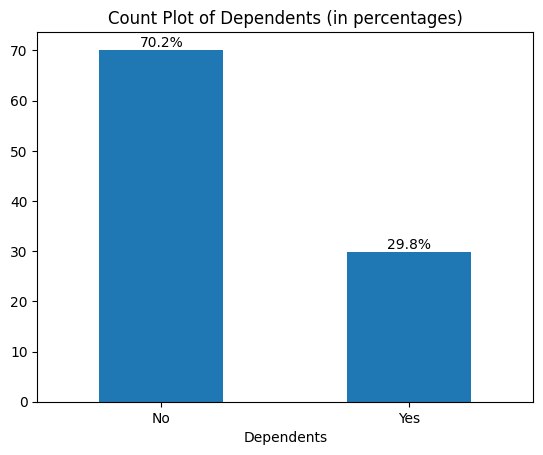

In [23]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['Dependents'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of Dependents (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

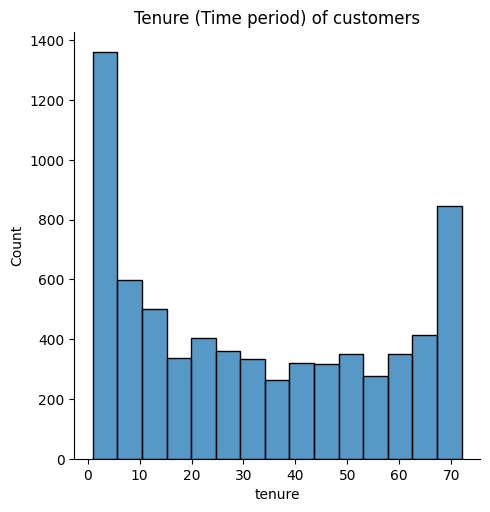

In [20]:
plt.style.context('ggplot')
sns.displot(data=df,x="tenure").set(title="Tenure (Time period) of customers")
plt.show()

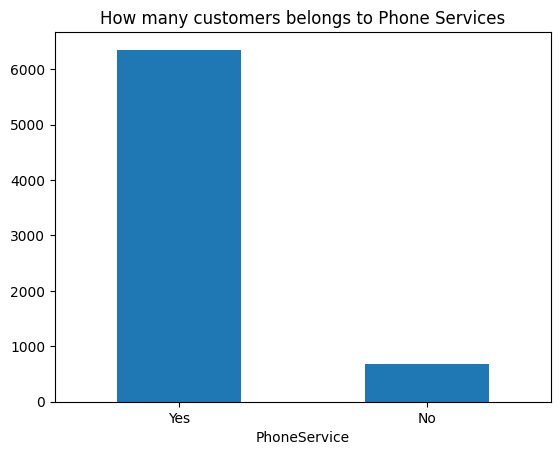

In [21]:
df['PhoneService'].value_counts().plot(kind='bar').set(title='How many customers belongs to Phone Services')
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '90.3%'), Text(0, 0, '9.7%')]

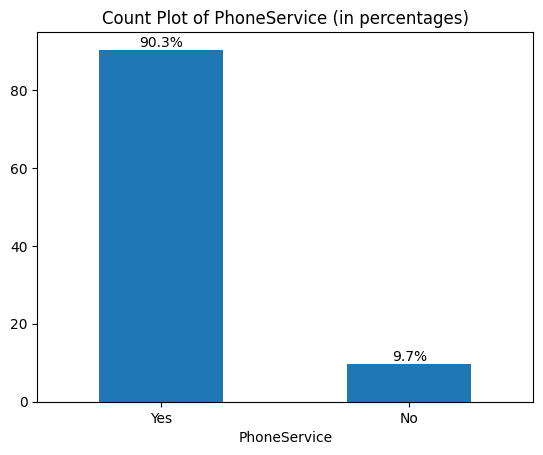

In [26]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['PhoneService'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of PhoneService (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

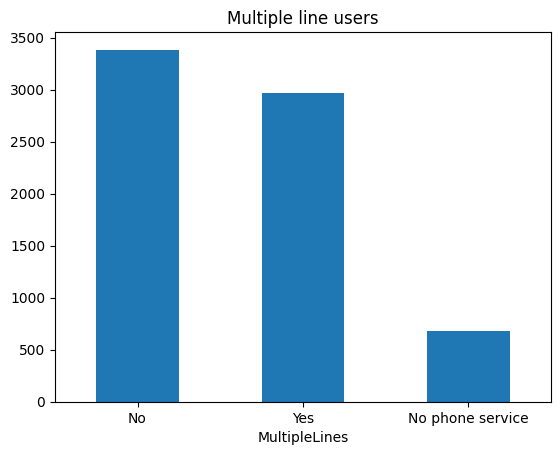

In [22]:
df['MultipleLines'].value_counts().plot(kind='bar').set(title="Multiple line users")
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '48.1%'), Text(0, 0, '42.2%'), Text(0, 0, '9.7%')]

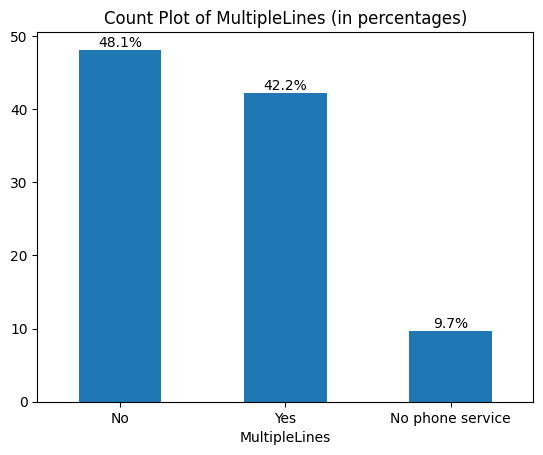

In [28]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['MultipleLines'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of MultipleLines (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

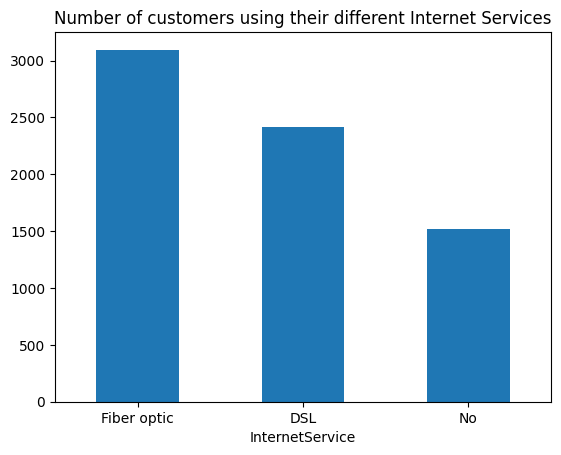

In [23]:
df['InternetService'].value_counts().plot(kind='bar').set(title='Number of customers using their different Internet Services')
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '44.0%'), Text(0, 0, '34.4%'), Text(0, 0, '21.6%')]

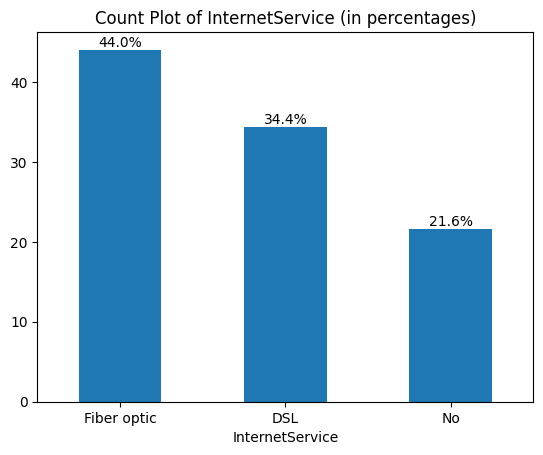

In [30]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['InternetService'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of InternetService (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

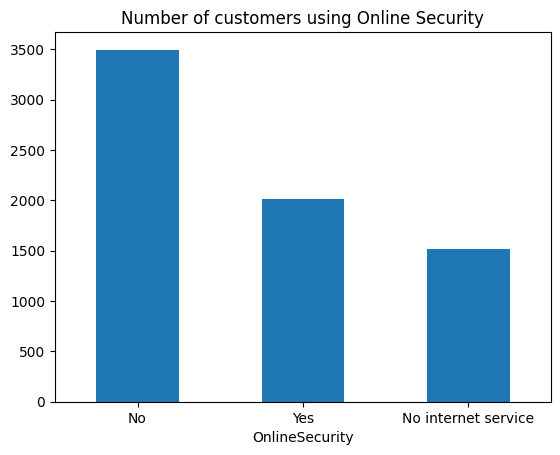

In [24]:
df['OnlineSecurity'].value_counts().plot(kind='bar').set(title='Number of customers using Online Security')
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '49.7%'), Text(0, 0, '28.7%'), Text(0, 0, '21.6%')]

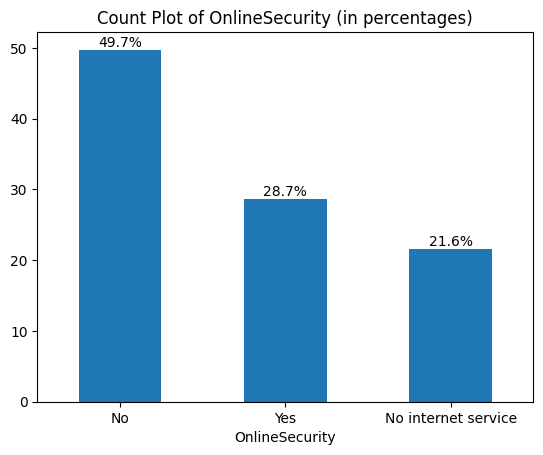

In [32]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['OnlineSecurity'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of OnlineSecurity (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

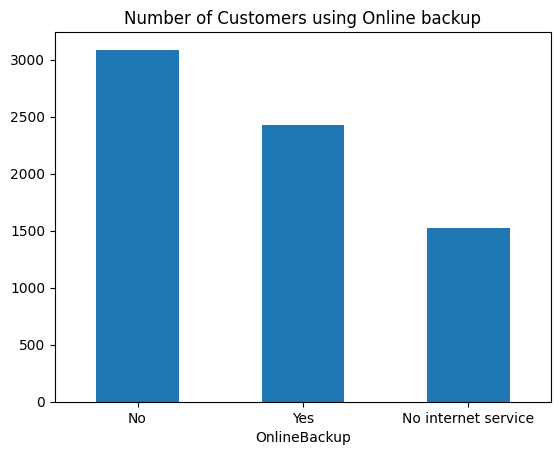

In [25]:
df['OnlineBackup'].value_counts().plot(kind='bar').set(title='Number of Customers using Online backup')
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '43.9%'), Text(0, 0, '34.5%'), Text(0, 0, '21.6%')]

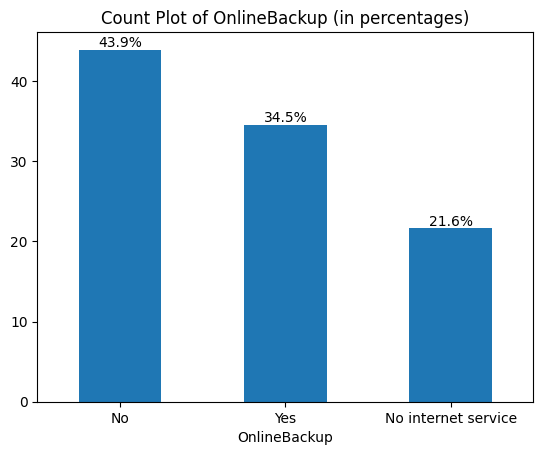

In [34]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['OnlineBackup'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of OnlineBackup (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

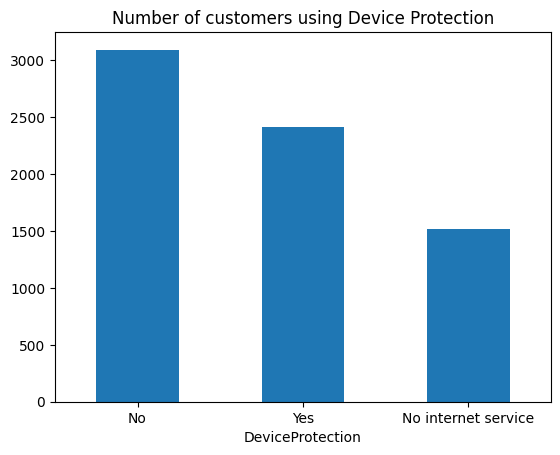

In [26]:
df['DeviceProtection'].value_counts().plot(kind='bar').set(title='Number of customers using Device Protection')
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '44.0%'), Text(0, 0, '34.4%'), Text(0, 0, '21.6%')]

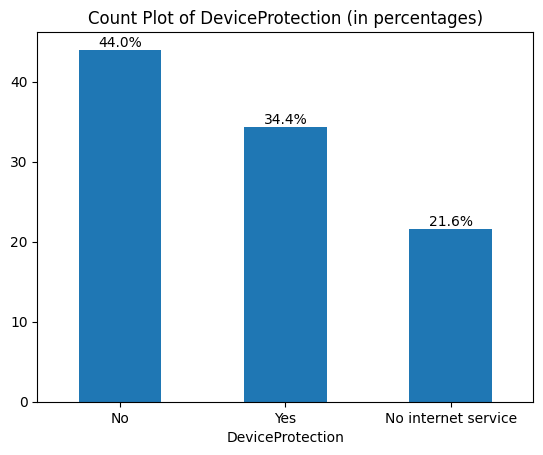

In [36]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['DeviceProtection'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of DeviceProtection (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

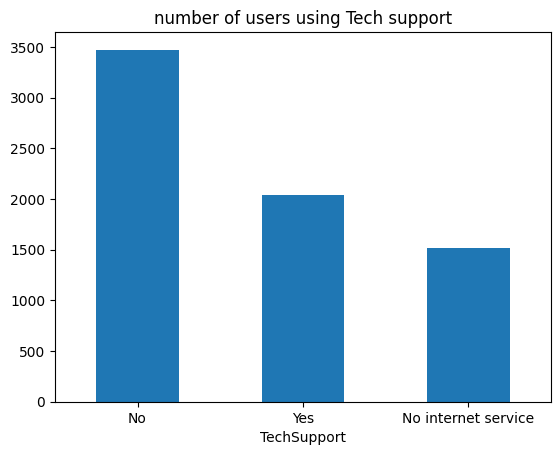

In [27]:
df['TechSupport'].value_counts().plot(kind='bar').set(title='number of users using Tech support')
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '49.4%'), Text(0, 0, '29.0%'), Text(0, 0, '21.6%')]

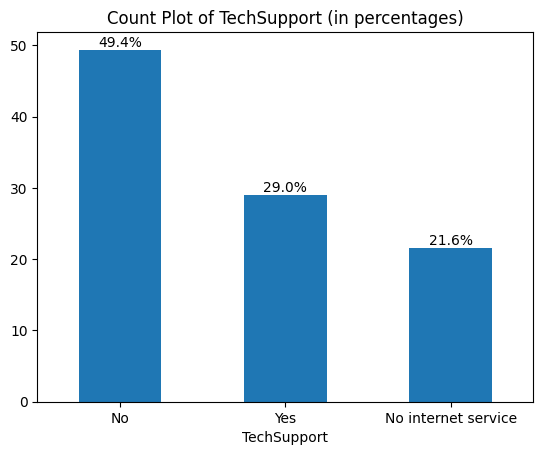

In [38]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['TechSupport'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of TechSupport (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

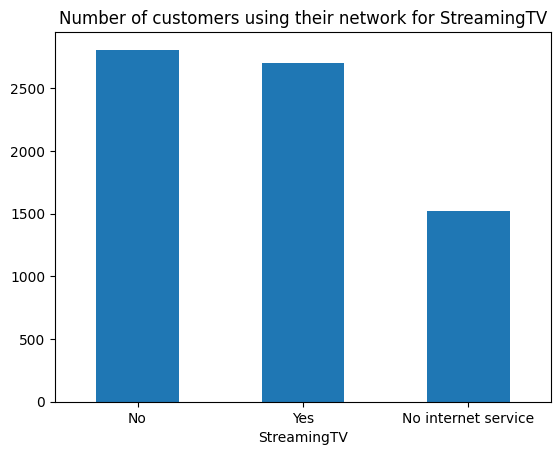

In [28]:
df['StreamingTV'].value_counts().plot(kind='bar').set(title="Number of customers using their network for StreamingTV")
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '39.9%'), Text(0, 0, '38.4%'), Text(0, 0, '21.6%')]

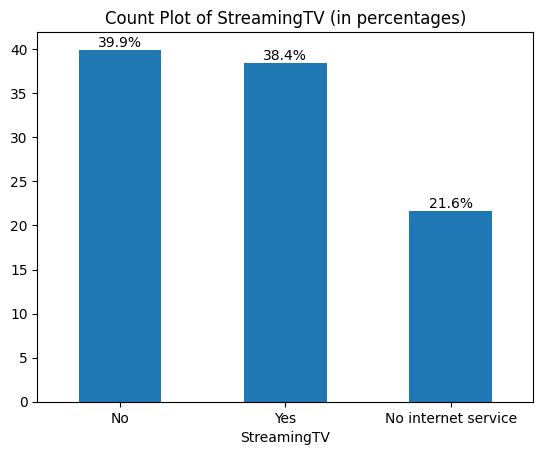

In [40]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['StreamingTV'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of StreamingTV (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

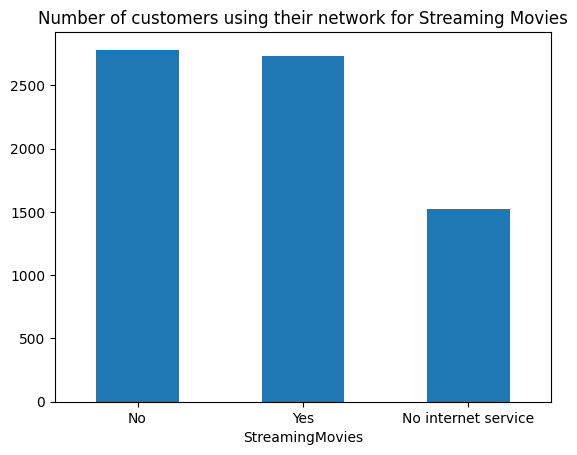

In [29]:
df['StreamingMovies'].value_counts().plot(kind='bar').set(title="Number of customers using their network for Streaming Movies")
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '39.5%'), Text(0, 0, '38.8%'), Text(0, 0, '21.6%')]

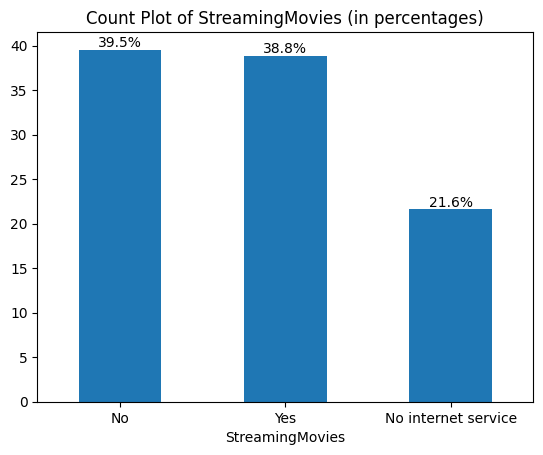

In [42]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['StreamingMovies'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of StreamingMovies (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

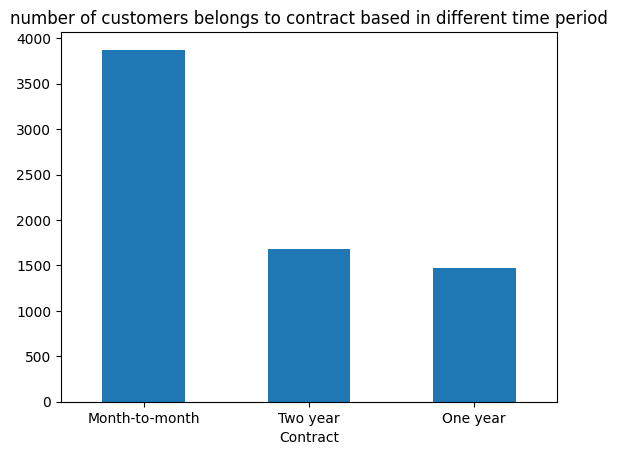

In [30]:
df['Contract'].value_counts().plot(kind='bar').set(title='number of customers belongs to contract based in different time period')
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '55.1%'), Text(0, 0, '24.0%'), Text(0, 0, '20.9%')]

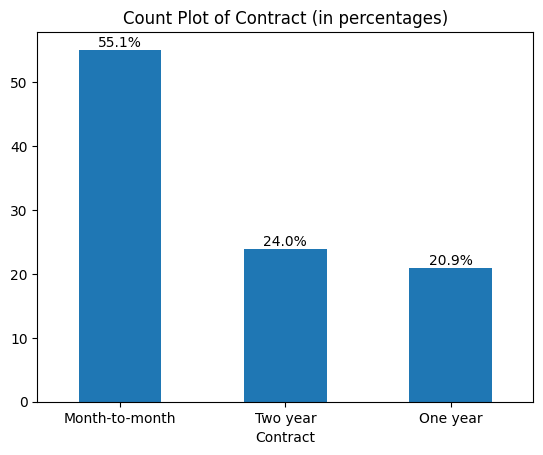

In [44]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['Contract'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of Contract (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

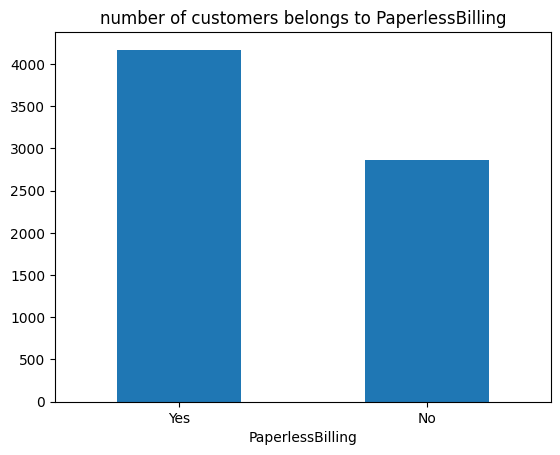

In [31]:
df['PaperlessBilling'].value_counts().plot(kind='bar').set(title='number of customers belongs to PaperlessBilling')
plt.xticks(rotation=0)
plt.show()

[Text(0, 0, '59.3%'), Text(0, 0, '40.7%')]

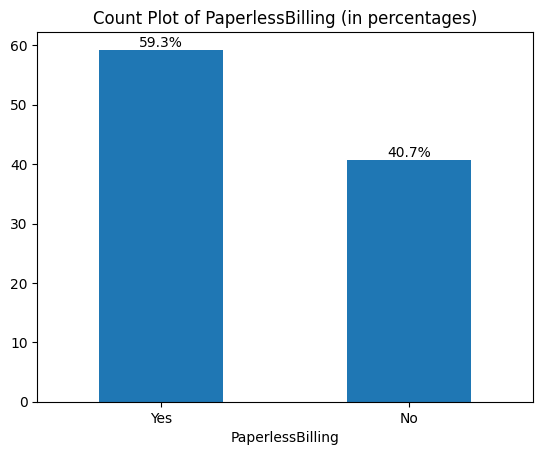

In [46]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['PaperlessBilling'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of PaperlessBilling (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

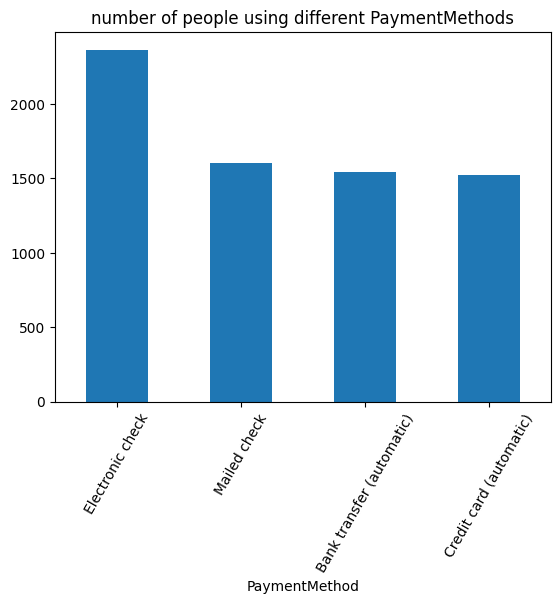

In [32]:
df['PaymentMethod'].value_counts().plot(kind='bar').set(title='number of people using different PaymentMethods')
plt.xticks(rotation=60)
plt.show()

[Text(0, 0, '33.6%'),
 Text(0, 0, '22.8%'),
 Text(0, 0, '21.9%'),
 Text(0, 0, '21.6%')]

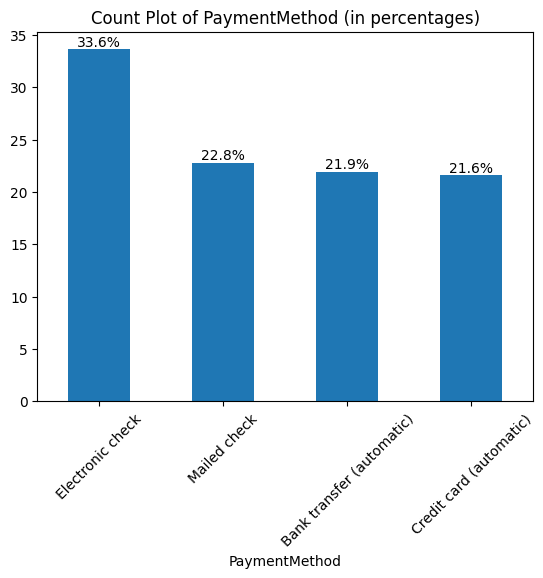

In [48]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['PaymentMethod'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of PaymentMethod (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=45)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot

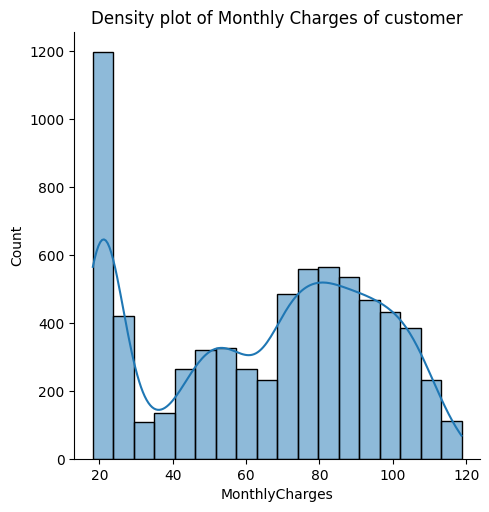

In [33]:
plt.style.context('ggplot')
sns.displot(data=df,x="MonthlyCharges",kde=True).set(title='Density plot of Monthly Charges of customer')
plt.show()

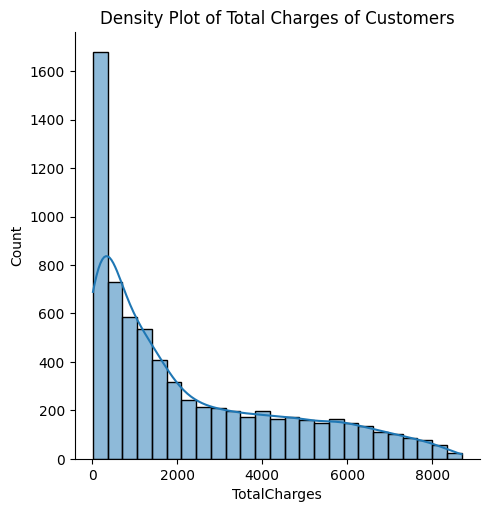

In [34]:
plt.style.context('ggplot')
sns.displot(data=df,x="TotalCharges",kde=True).set(title='Density Plot of Total Charges of Customers')
plt.show()

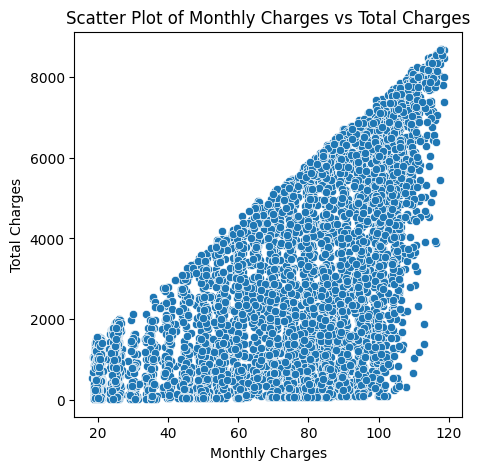

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Create the scatter plot
plt.figure(figsize=(5, 5))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.title('Scatter Plot of Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

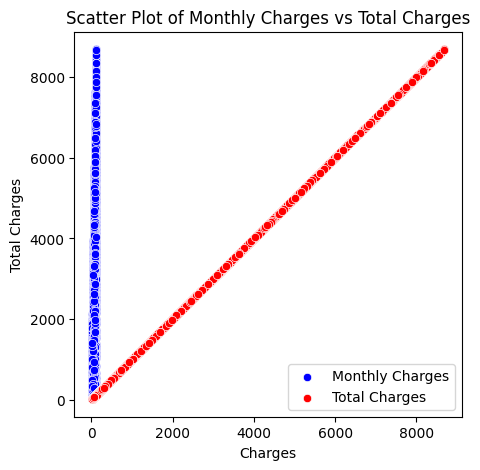

In [104]:
plt.figure(figsize=(5, 5))

# Plot MonthlyCharges
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, color='blue', label='Monthly Charges')

# Plot TotalCharges as separate points
sns.scatterplot(x='TotalCharges', y='TotalCharges', data=df, color='red', label='Total Charges')

# Add titles and labels
plt.title('Scatter Plot of Monthly Charges vs Total Charges')
plt.xlabel('Charges')
plt.ylabel('Total Charges')
plt.legend()
plt.show()

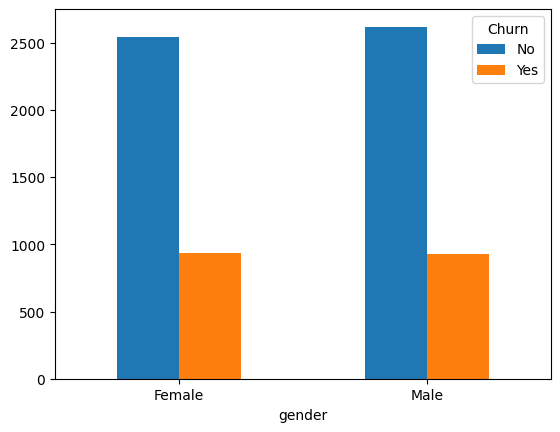

In [36]:
pd.crosstab(df['gender'],df['Churn']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

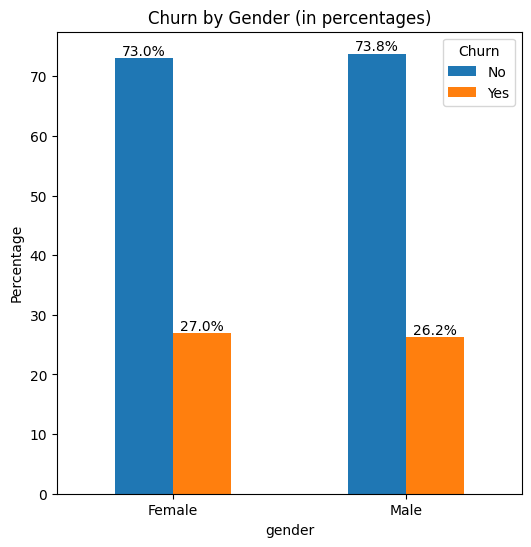

In [53]:
churn_gender_counts = df.groupby(['gender', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by Gender (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

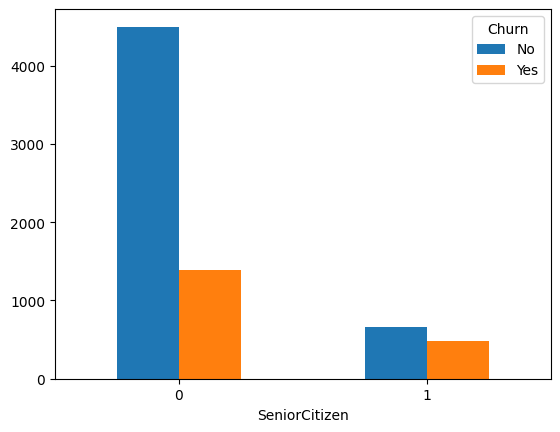

In [37]:
pd.crosstab(df['SeniorCitizen'],df['Churn']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

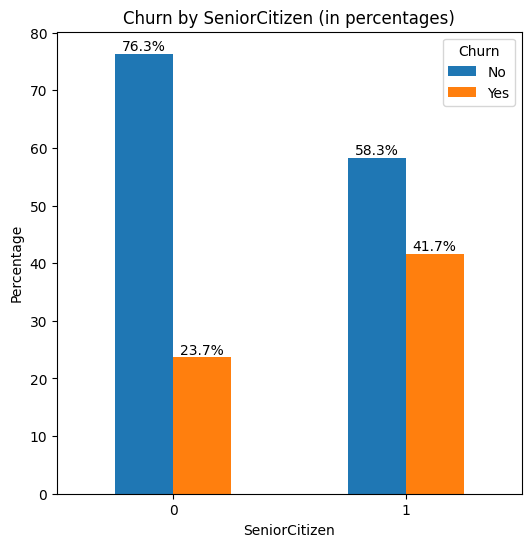

In [55]:
churn_gender_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by SeniorCitizen (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

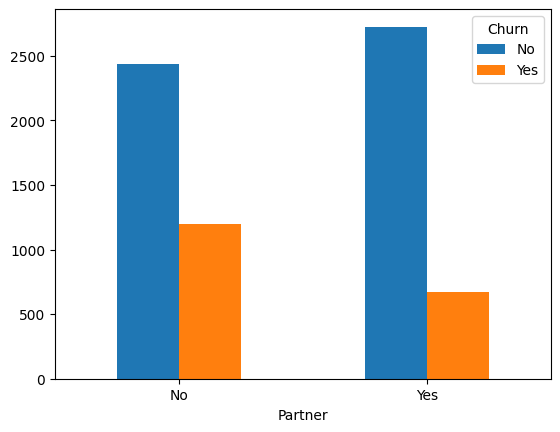

In [38]:
pd.crosstab(df['Partner'],df['Churn']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

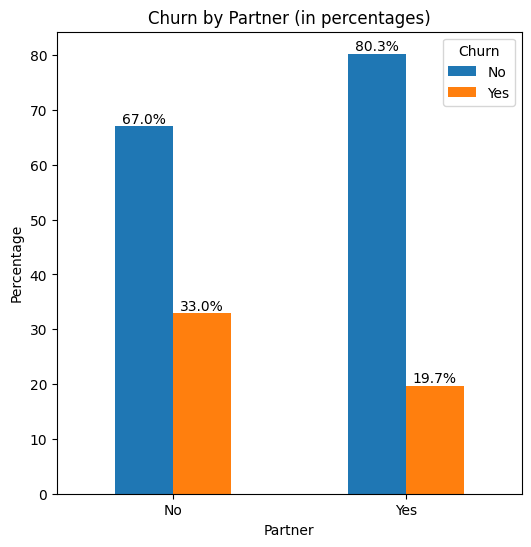

In [57]:
churn_gender_counts = df.groupby(['Partner', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by Partner (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

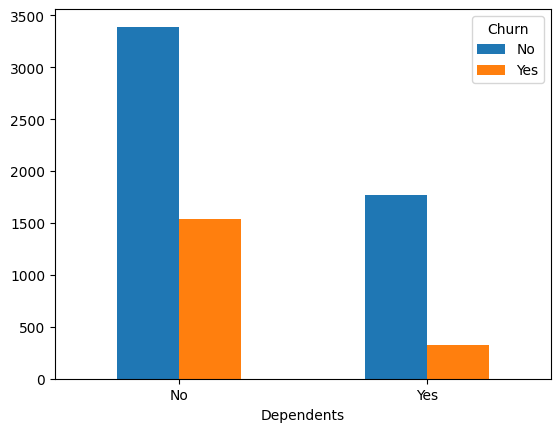

In [39]:
pd.crosstab(df['Dependents'],df['Churn']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

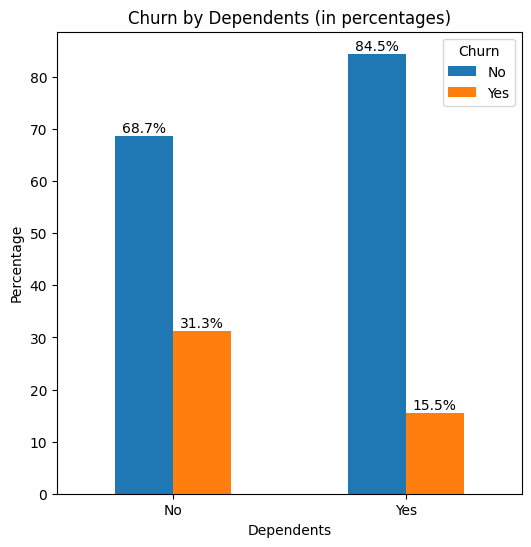

In [59]:
churn_gender_counts = df.groupby(['Dependents', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by Dependents (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

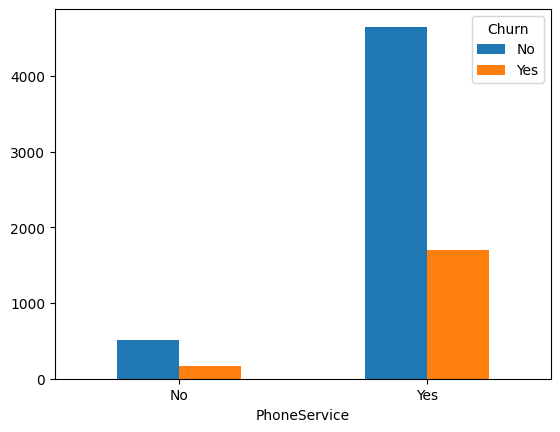

In [40]:
pd.crosstab(df['PhoneService'],df['Churn']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

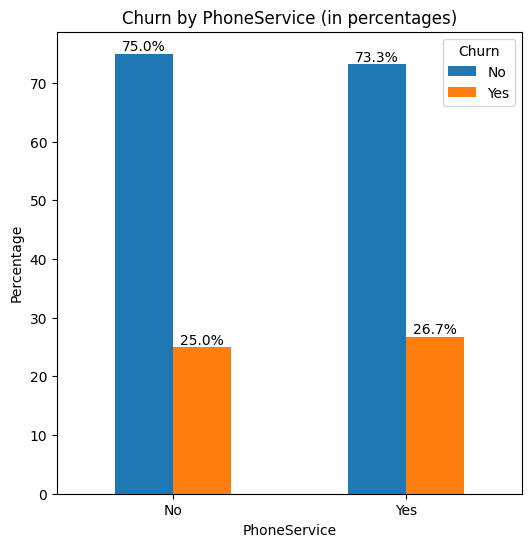

In [61]:
churn_gender_counts = df.groupby(['PhoneService', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by PhoneService (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

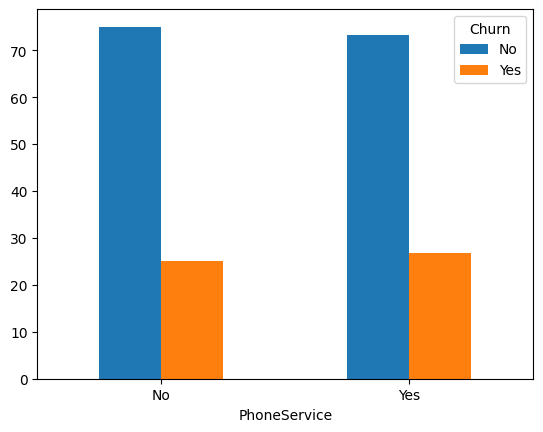

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Create a crosstab and normalize it to get percentages
crosstab_percentage = pd.crosstab(df['PhoneService'], df['Churn'], normalize='index') * 100

# Plot the normalized crosstab
crosstab_percentage.plot(kind='bar')

# Set the x-ticks rotation
plt.xticks(rotation=0)

# Show the plot
plt.show()

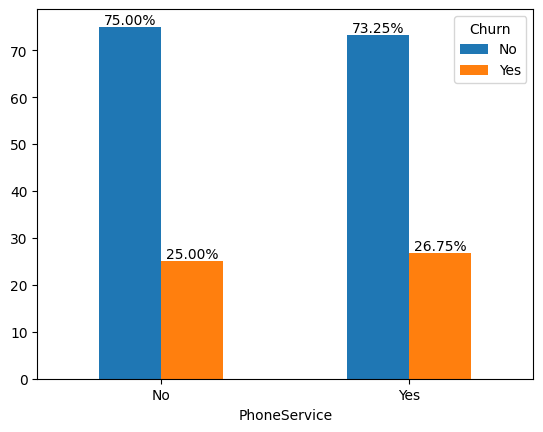

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Create a crosstab and normalize it to get percentages
crosstab_percentage = pd.crosstab(df['PhoneService'], df['Churn'], normalize='index') * 100

# Plot the normalized crosstab
ax = crosstab_percentage.plot(kind='bar')

# Set the x-ticks rotation
plt.xticks(rotation=0)

# Add percentages on top of the bars using bar_label
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.2f%%', label_type='edge')
# Show the plot
plt.show()

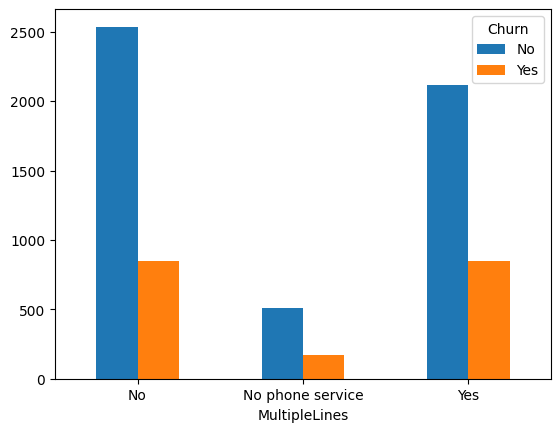

In [41]:
pd.crosstab(df['MultipleLines'],df['Churn']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

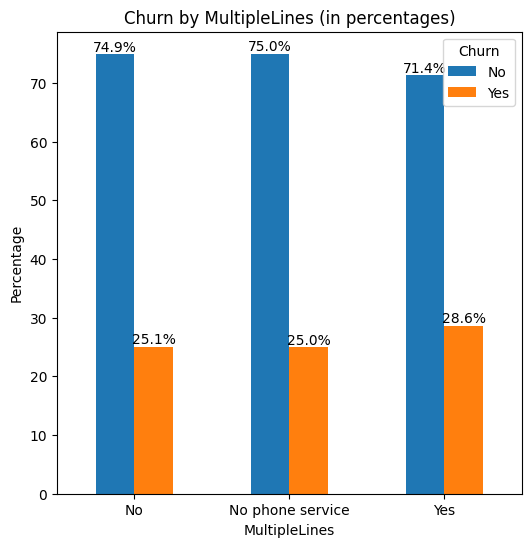

In [65]:
churn_gender_counts = df.groupby(['MultipleLines', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by MultipleLines (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

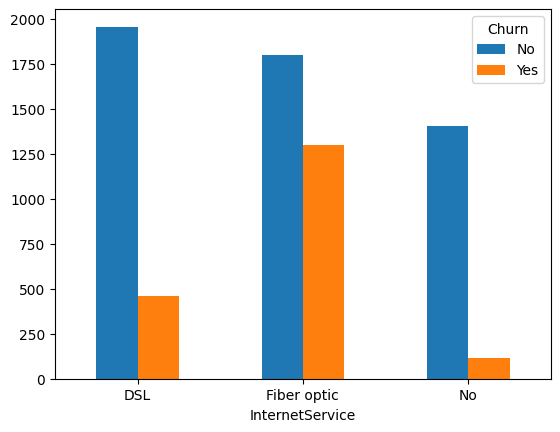

In [42]:
pd.crosstab(df['InternetService'],df['Churn']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

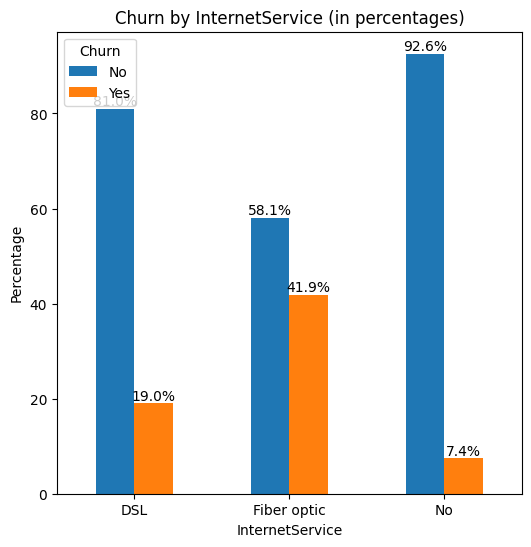

In [67]:
churn_gender_counts = df.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by InternetService (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

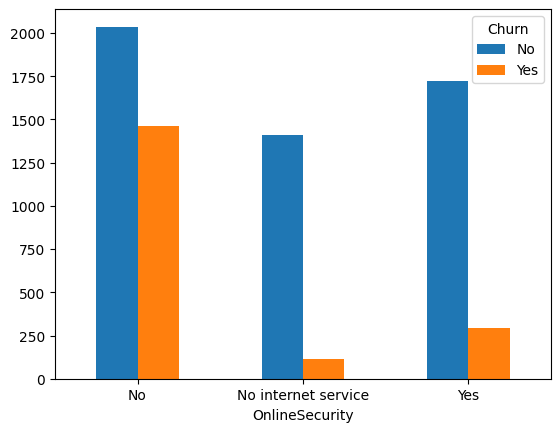

In [43]:
pd.crosstab(df['OnlineSecurity'],df['Churn']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

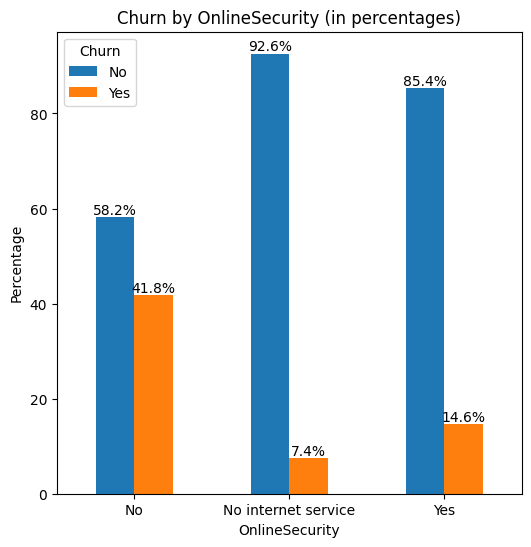

In [69]:
churn_gender_counts = df.groupby(['OnlineSecurity', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by OnlineSecurity (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

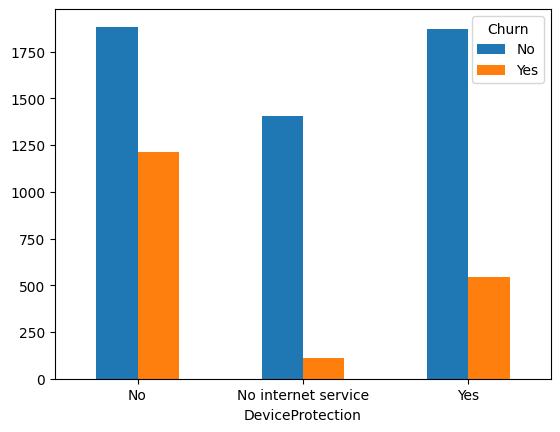

In [44]:
pd.crosstab(df['DeviceProtection'],df['Churn']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

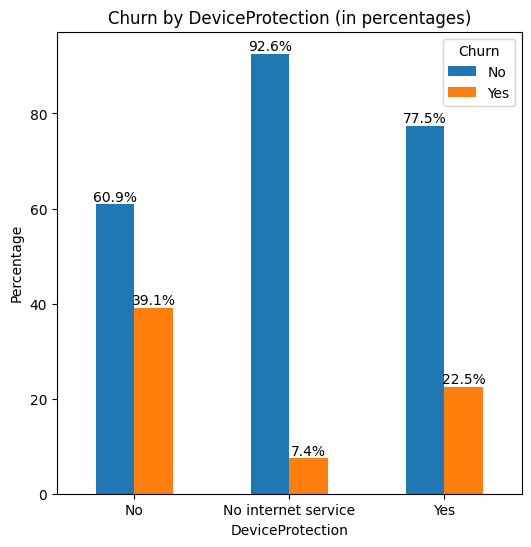

In [71]:
churn_gender_counts = df.groupby(['DeviceProtection', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by DeviceProtection (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

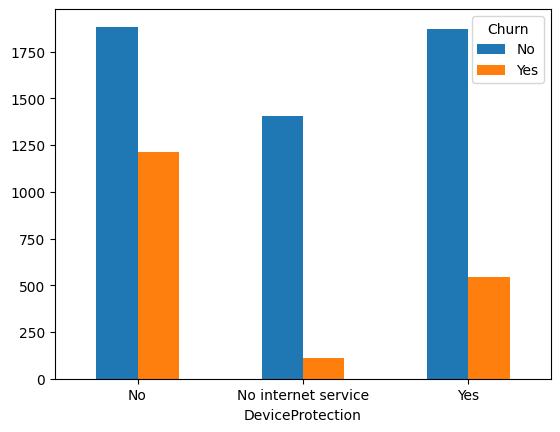

In [45]:
pd.crosstab(df['DeviceProtection'],df["Churn"]).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

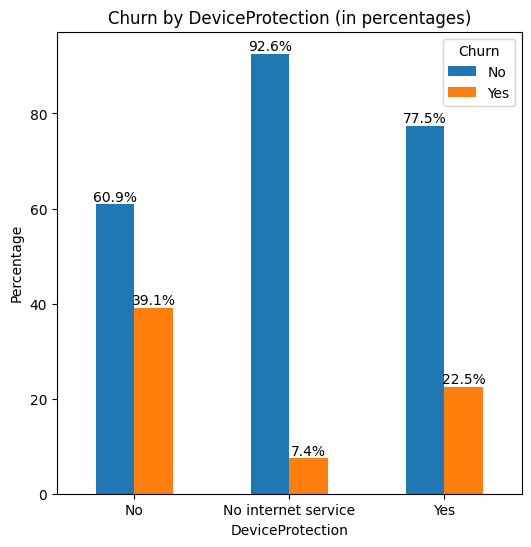

In [73]:
churn_gender_counts = df.groupby(['DeviceProtection', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by DeviceProtection (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

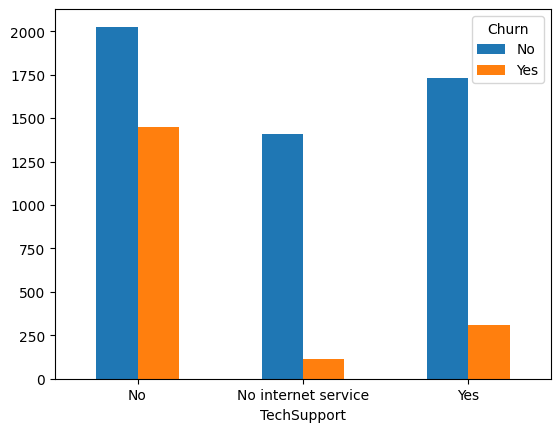

In [46]:
pd.crosstab(df['TechSupport'],df['Churn']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

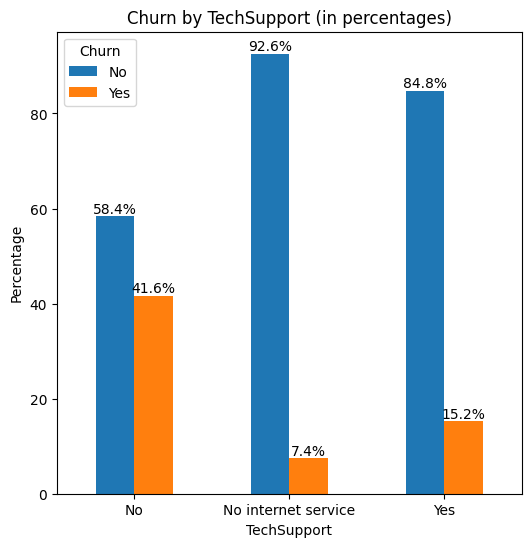

In [75]:
churn_gender_counts = df.groupby(['TechSupport', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by TechSupport (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

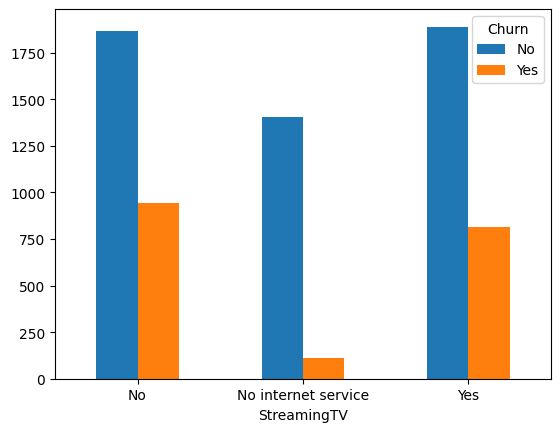

In [47]:
pd.crosstab(df['StreamingTV'],df['Churn']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

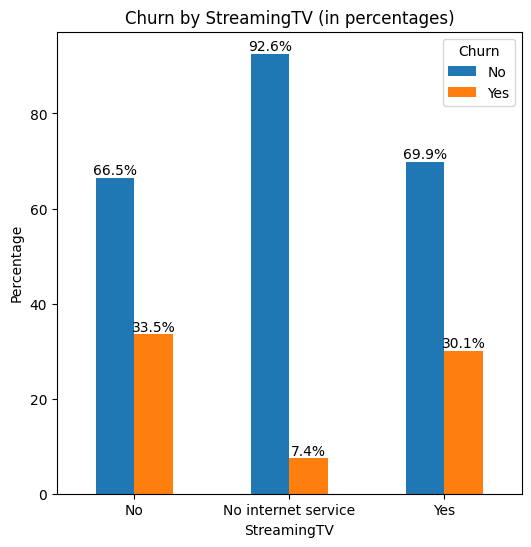

In [77]:
churn_gender_counts = df.groupby(['StreamingTV', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by StreamingTV (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

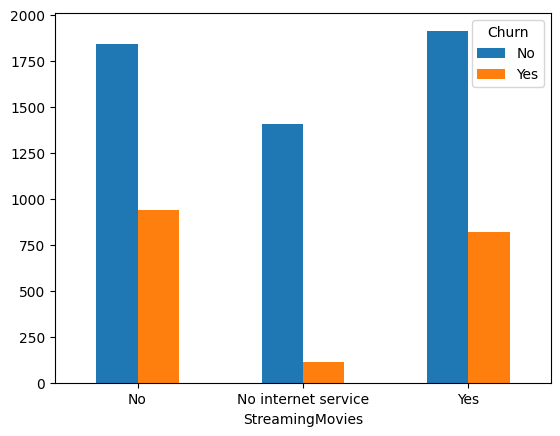

In [48]:
pd.crosstab(df['StreamingMovies'],df["Churn"]).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

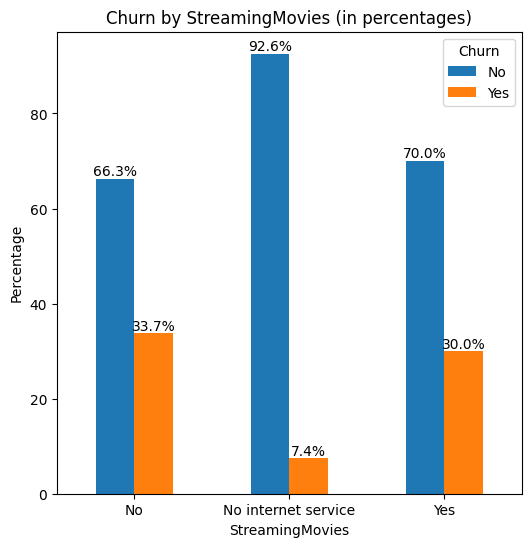

In [79]:
churn_gender_counts = df.groupby(['StreamingMovies', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by StreamingMovies (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

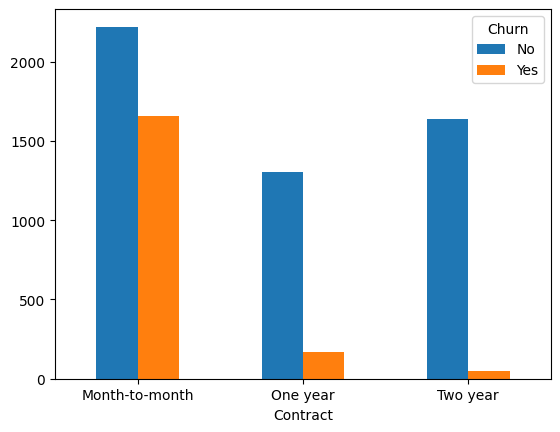

In [49]:
pd.crosstab(df['Contract'],df['Churn']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

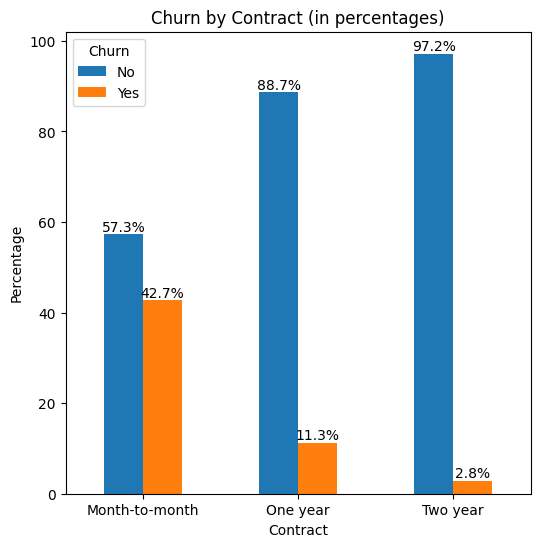

In [81]:
churn_gender_counts = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by Contract (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

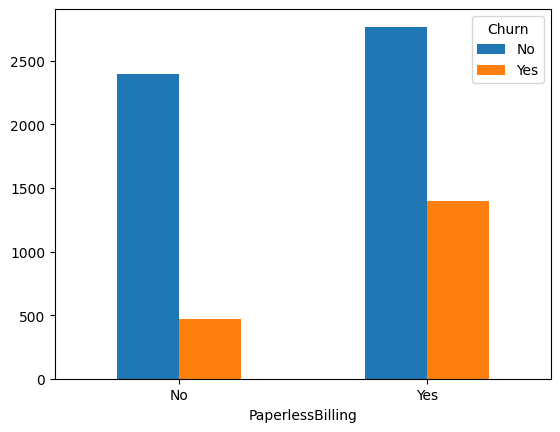

In [50]:
pd.crosstab(df['PaperlessBilling'],df['Churn']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

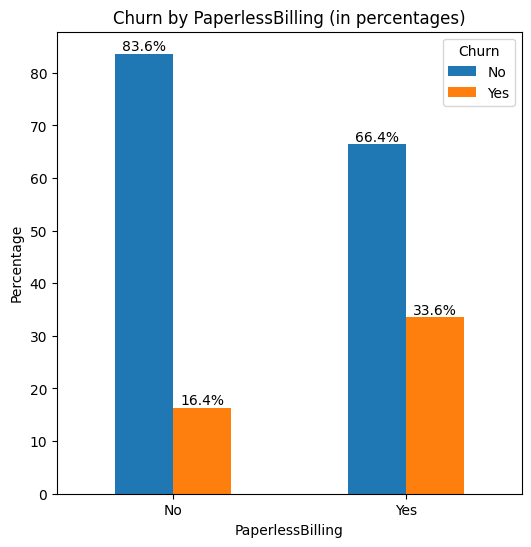

In [83]:
churn_gender_counts = df.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by PaperlessBilling (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

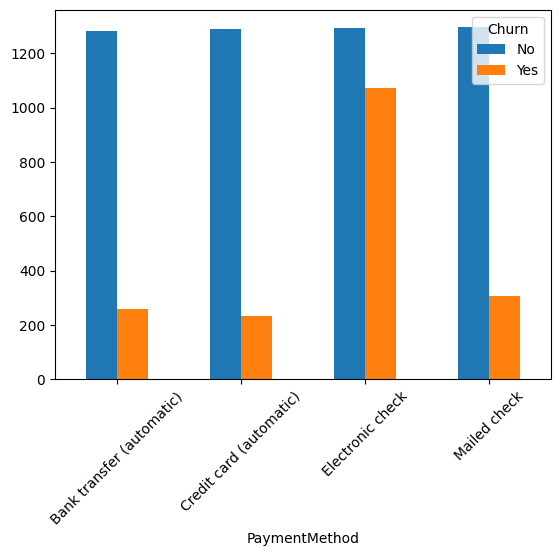

In [51]:
pd.crosstab(df['PaymentMethod'],df['Churn']).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

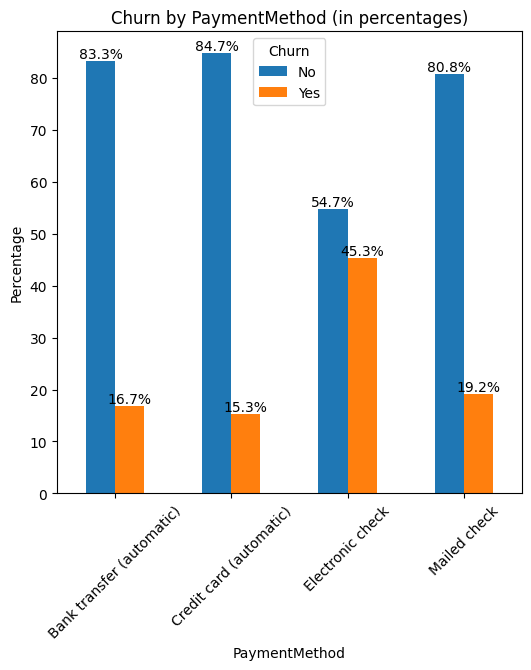

In [85]:
churn_gender_counts = df.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
churn_gender_percentages = churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100

# Plot the percentage values as a grouped bar plot
ax = churn_gender_percentages.plot(kind='bar', stacked=False, figsize=(6, 6), title='Churn by PaymentMethod (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=45)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.ylabel('Percentage')
plt.show()

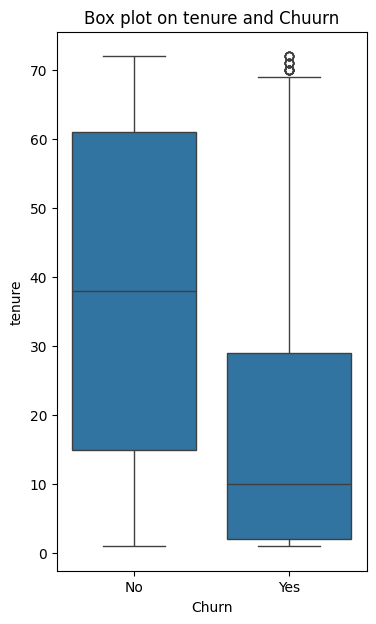

In [55]:
plt.figure(figsize=(4,7))
sns.boxplot(x='Churn',y='tenure',data=df)
plt.title('Box plot on tenure and Chuurn')
plt.xticks(rotation=0)
plt.show()

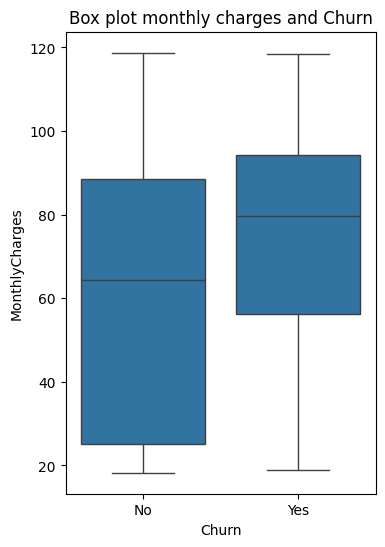

In [56]:
plt.figure(figsize=(4, 6))
sns.boxplot(x='Churn', y='MonthlyCharges',data=df)
plt.title('Box plot monthly charges and Churn')
plt.xticks(rotation=0)
plt.show()

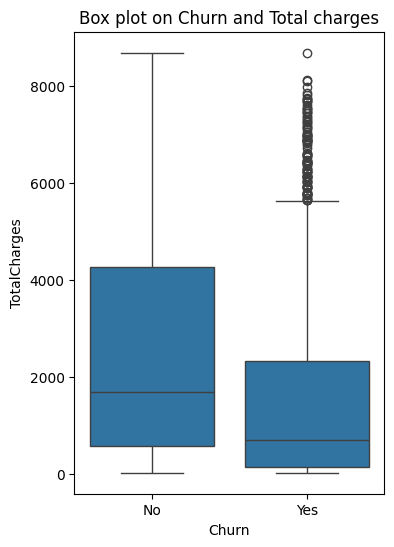

In [57]:
plt.figure(figsize=(4, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Box plot on Churn and Total charges')
plt.xticks(rotation=0)
plt.show()

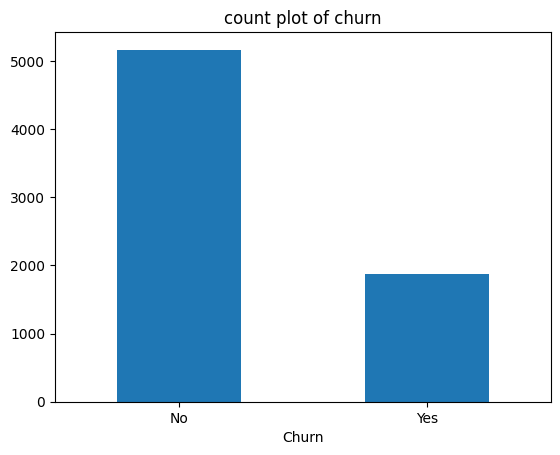

In [58]:
df['Churn'].value_counts().plot(kind='bar').set(title='count plot of churn')
plt.xticks(rotation=0)
plt.show()

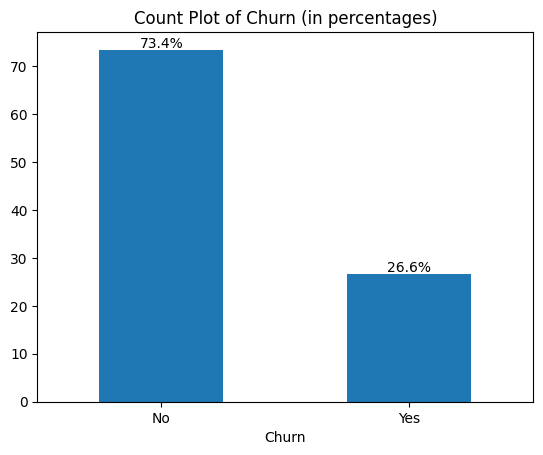

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data frame for illustration
# df = pd.DataFrame({'Churn': ['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No']})

# Calculate value counts and convert to percentages
churn_counts = df['Churn'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
churn_counts.plot(kind='bar')

# Set the title
plt.title('Count Plot of Churn (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
for i, v in enumerate(churn_counts):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

# Show the plot
plt.show()

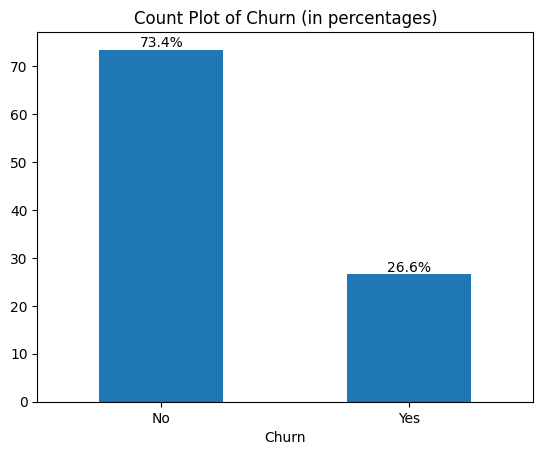

In [94]:
import matplotlib.pyplot as plt

# Calculate value counts and convert to percentages
churn_counts = df['Churn'].value_counts(normalize=True) * 100

# Plot the percentage values as a bar plot
ax = churn_counts.plot(kind='bar', title='Count Plot of Churn (in percentages)')

# Set x-axis labels with no rotation
plt.xticks(rotation=0)

# Add percentage labels on top of the bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge')

# Show the plot
plt.show()

In [95]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

In [96]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

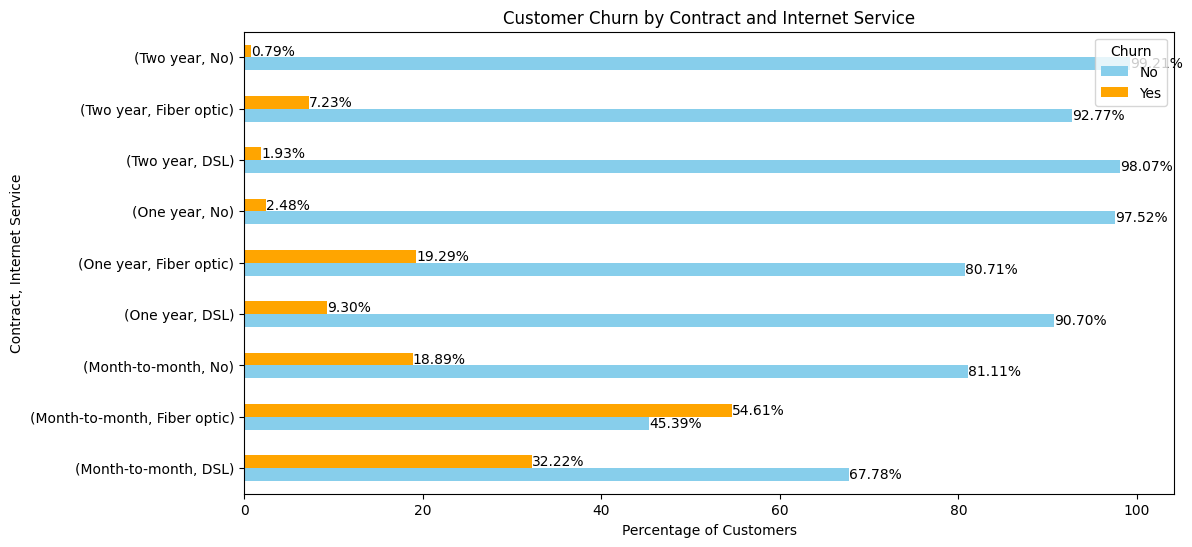

In [117]:
# Calculate counts using crosstab 
counts = pd.crosstab([df['Contract'], df['InternetService']], df['Churn'])

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot percentages
ax = percentages.plot(kind='barh', figsize=(12, 6), color=['skyblue', 'orange'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')

plt.title('Customer Churn by Contract and Internet Service')
plt.ylabel('Contract, Internet Service')
plt.xlabel('Percentage of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

In [76]:
df = df.drop(columns=['customerID'])

In [77]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [78]:
X = df.drop(columns=['Churn'])

y = df['Churn']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5274, 19) (5274,)
(1758, 19) (1758,)


In [80]:
X_train.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5274, 19) (5274,)
(1758, 19) (1758,)


In [82]:
from sklearn.preprocessing import OneHotEncoder
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64','float'])

In [103]:
encoder = OneHotEncoder()
x_train_cat_transformed = encoder.fit_transform(X_train_cat)
feature_names = encoder.get_feature_names_out(X_train_cat.columns)
X_train_cat_transformed = pd.DataFrame(x_train_cat_transformed.toarray(), 
                                       columns=feature_names, 
                                       index=X_train_cat.index)
X_train_cat_transformed

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3540,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3504,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
6715,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2866,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6609,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3269,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1658,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2612,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [96]:
X_train_num_transformed = scaler.fit_transform(X_train_num)
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                          columns = X_train_num.columns,
                                          index = X_train_num.index)
X_train_num_transformed

,tenure,MonthlyCharges,TotalCharges
3540,1.628149,1.460662,2.416469
3504,1.464856,-1.495682,-0.392705
6715,-0.862073,0.812400,-0.564123
2866,-0.821250,0.659083,-0.552154
6609,-1.270306,-1.490683,-0.993420
...,...,...,...
4939,-1.270306,-1.530679,-0.993951
3269,1.342386,-1.334033,-0.293920
1658,0.730036,1.370672,1.361345
2612,-0.739603,0.520765,-0.499188


In [86]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64','float'])

In [97]:
x_test_cat_transformed = encoder.transform(X_test_cat)
feature_names = encoder.get_feature_names_out(X_test_cat.columns)
X_test_cat_transformed = pd.DataFrame(x_test_cat_transformed.toarray(),
                                      columns=feature_names,
                                      index=X_test_cat.index)
X_test_cat_transformed

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5561,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5814,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2645,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3983,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6438,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
450,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2116,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6397,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [98]:
X_test_num_transformed = scaler.transform(X_test_num)
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num),
                                         columns = X_test_num.columns,
                                         index = X_test_num.index)
X_test_num_transformed

,tenure,MonthlyCharges,TotalCharges
5561,-1.270306,-1.472352,-0.993177
5814,-0.657957,-1.474018,-0.856184
2645,-1.270306,-1.500682,-0.993553
3983,-1.270306,-1.352365,-0.991584
6438,-1.270306,0.319120,-0.969394
...,...,...,...
2063,0.770859,0.385779,0.752709
450,1.301562,-1.337366,-0.275424
2116,-1.270306,-0.349141,-0.978265
6397,0.893329,0.014153,0.559631


In [99]:
X_train_transformed = pd.concat([X_train_num_transformed_df,X_train_cat_transformed_df],axis=1)
X_test_transformed = pd.concat([X_test_num_transformed_df,X_test_cat_transformed_df],axis=1)

X_train_transformed

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3540,1.628149,1.460662,2.416469,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3504,1.464856,-1.495682,-0.392705,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
6715,-0.862073,0.812400,-0.564123,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2866,-0.821250,0.659083,-0.552154,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6609,-1.270306,-1.490683,-0.993420,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,-1.270306,-1.530679,-0.993951,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3269,1.342386,-1.334033,-0.293920,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1658,0.730036,1.370672,1.361345,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2612,-0.739603,0.520765,-0.499188,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [100]:
X_test_transformed

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5561,-1.270306,-1.472352,-0.993177,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5814,-0.657957,-1.474018,-0.856184,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2645,-1.270306,-1.500682,-0.993553,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3983,-1.270306,-1.352365,-0.991584,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6438,-1.270306,0.319120,-0.969394,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,0.770859,0.385779,0.752709,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
450,1.301562,-1.337366,-0.275424,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2116,-1.270306,-0.349141,-0.978265,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6397,0.893329,0.014153,0.559631,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_transformed, y_train)


LogisticRegression()

In [92]:
y_train_pred = model.predict(X_train_transformed)

# Predict on the test set
y_test_pred = model.predict(X_test_transformed)

In [93]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [94]:
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.80
Test Accuracy: 0.81
